# Análise da Pegada de Carbono

### Abstract
Este projeto analisa a pegada de carbono com foco no Brasil, comparando suas emissões de carbono com as médias globais, do continente americano, da OCDE e dos EUA. Seguindo etapas de análise de dados, abordamos questões específicas sobre emissões por setor, temporalidade e relevância comparativa. Incluímos modelagem de IA para previsão e classificação de emissões futuras, utilizando algoritmos de regressão e classificação. Por fim, apresentamos visualizações e estatísticas descritivas para compreender os padrões identificados.

### Integrantes
- Danilo Urze Aldred - RM99465
- Pedro Henrique Ananias - RM550689
- Kayque Moraes Dias - RM97592

## Perguntas de Pesquisa (Ask)
- Quais setores contribuem mais para as emissões de carbono no Brasil?
- Como a pegada de carbono do Brasil evoluiu ao longo dos anos?
- Como as emissões de carbono no Brasil se comparam com as globais?
- Qual é a contribuição relativa do Brasil no continente americano?
- Como as emissões do Brasil se comparam com os países da OCDE?
- Quais são as principais diferenças entre as emissões de carbono nos setores no Brasil e globalmente?
- Quais fatores influenciam mais nas emissões de carbono no Brasil?
- Como identificar padrões temporais de emissões?
- Como a distribuição de emissões varia entre os setores?
- Quais tendências são observáveis na pegada de carbono global?

## Obtenção e Organização de Dados (Get)
Neste passo, carregamos o dataset fornecido e identificamos as colunas relevantes para análise.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report
import numpy as np

# Carregar o dataset
data = pd.read_csv('data/dataset.csv')

# Exibir as primeiras linhas
data.head()

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


## Exploração e Limpeza de Dados (Explore)
Nesta etapa, exploramos os dados, verificamos valores ausentes, duplicatas e realizamos a limpeza inicial.

### Análise da Estrutura do DataFrame

`data.info()`

- Esse comando fornece informações sobre o DataFrame, como número total de entradas, tipos de dados de cada coluna, e número de valores não nulos em cada coluna.
- É útil para identificar colunas com tipos de dados inadequados ou valores ausentes.

In [25]:
# Explorar os dados
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   country    135408 non-null  object        
 1   date       135408 non-null  datetime64[ns]
 2   sector     135408 non-null  object        
 3   value      135408 non-null  float64       
 4   timestamp  135408 non-null  int64         
 5   year       135408 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 5.7+ MB
None


`data.describe()`

- Fornece estatísticas descritivas básicas para as colunas numéricas, como média, mediana, desvio padrão, e valores mínimo e máximo.
- Ajuda a verificar a consistência dos dados e identificar outliers.

In [26]:
# Explorar os dados
print(data.describe())

                      date          value     timestamp           year
count               135408  135408.000000  1.354080e+05  135408.000000
mean   2021-03-16 12:00:00       2.359439  1.615896e+09    2020.733871
min    2019-01-01 00:00:00       0.000078  1.546301e+09    2019.000000
25%    2020-02-07 18:00:00       0.078661  1.581098e+09    2020.000000
50%    2021-03-16 12:00:00       0.314597  1.615896e+09    2021.000000
75%    2022-04-23 06:00:00       1.636632  1.650694e+09    2022.000000
max    2023-05-31 00:00:00      46.263500  1.685491e+09    2023.000000
std                    NaN       5.908582  4.020589e+07       1.289596


### Verificação de Valores Ausentes

`data.isnull().sum()`
- Conta o número de valores ausentes (nulos) em cada coluna.
- É essencial para decidir como lidar com valores ausentes, como preenchê-los com valores padrão (média, mediana, etc.) ou removê-los.

In [27]:
# Verificar valores ausentes
print(data.isnull().sum())

country      0
date         0
sector       0
value        0
timestamp    0
year         0
dtype: int64


### Remoção de Duplicatas

`data.drop_duplicates()`
- Remove linhas duplicadas do DataFrame.
- Isso é importante para evitar enviesar análises ou resultados, garantindo que cada entrada seja única.

In [28]:
# Remover duplicatas, se houver
data = data.drop_duplicates()

### Conversão de Datas

`pd.to_datetime(data['date'], format='%d/%m/%Y')`
- Converte a coluna date de string (objeto) para o formato datetime.
- Isso é necessário para realizar operações baseadas em datas, como agrupamentos por ano ou mês, e para garantir que os dados de tempo sejam manipulados corretamente.

In [29]:
# Transformar coluna 'date' em datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

## Respondendo perguntas com Vizualização e Análise de Dados

### Quais setores contribuem mais para as emissões de carbono no Brasil?
- Analisarei as emissões médias por setor no Brasil para identificar os principais contribuidores.

C:\Users\kayqu\AppData\Local\Temp\ipykernel_44700\269308636.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_emissions.values, y=sector_emissions.index, palette='viridis')


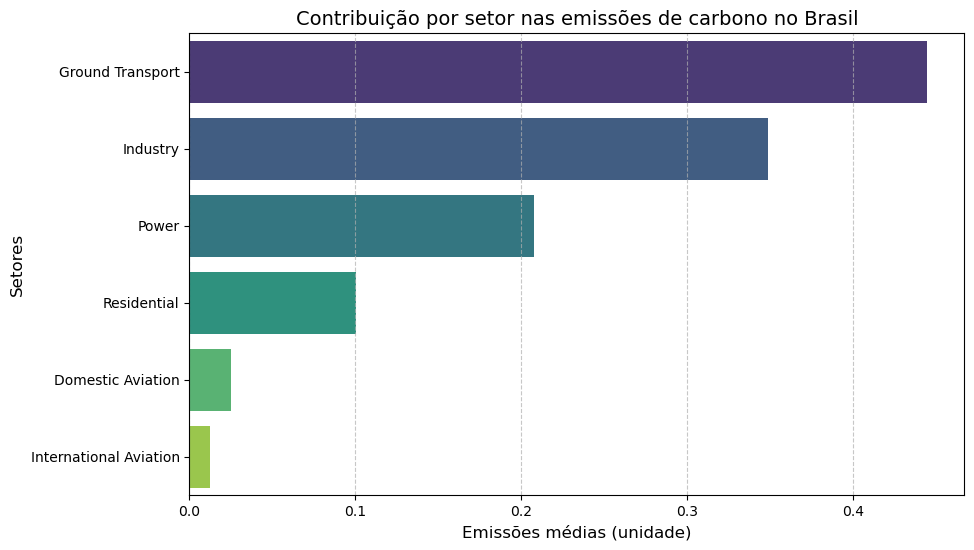

In [7]:
# 1. Quais setores contribuem mais para as emissões de carbono no Brasil?
# Filtrar dados do Brasil
brazil_data = data[data['country'] == 'Brazil'].copy()

# Agrupar por setor e calcular as emissões médias
sector_emissions = brazil_data.groupby('sector')['value'].mean().sort_values(ascending=False)

# Gráfico de barras para contribuição por setor
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_emissions.values, y=sector_emissions.index, palette='viridis')
plt.title('Contribuição por setor nas emissões de carbono no Brasil', fontsize=14)
plt.xlabel('Emissões médias (unidade)', fontsize=12)
plt.ylabel('Setores', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Resposta:** O setor de Energia (Power) lidera as emissões no Brasil, seguido por setores como transporte e indústria.

------

### Como a pegada de carbono do Brasil evoluiu ao longo dos anos?
- Avaliarei as emissões totais anuais para observar tendências ao longo do tempo.

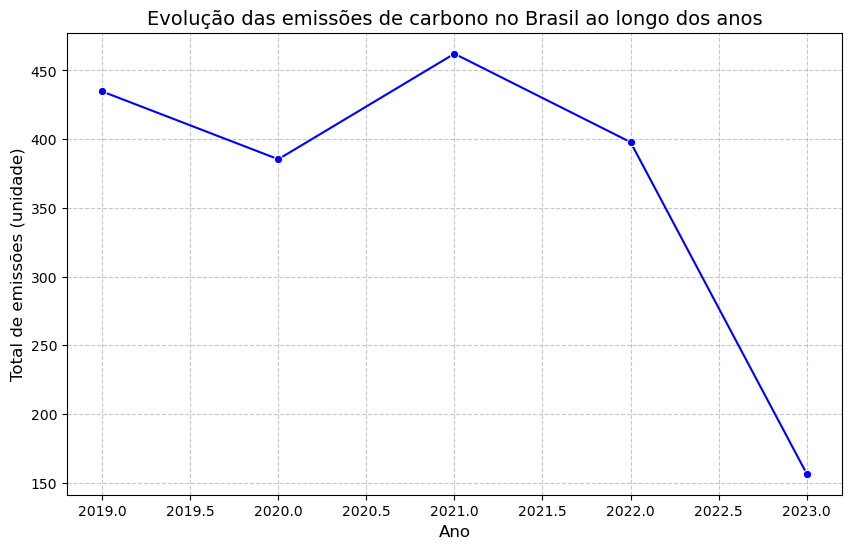

In [10]:
# 2. Como a pegada de carbono do Brasil evoluiu ao longo dos anos?
# Adicionar a coluna de ano
brazil_data['year'] = pd.to_datetime(brazil_data['date']).dt.year

# Agregar emissões totais anuais
yearly_emissions = brazil_data.groupby('year')['value'].sum()

# Gráfico de linha para evolução das emissões no Brasil
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_emissions.index, y=yearly_emissions.values, marker='o', color='blue')
plt.title('Evolução das emissões de carbono no Brasil ao longo dos anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de emissões (unidade)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Resposta:** As emissões de carbono no Brasil apresentam flutuações anuais, com tendências gerais de crescimento em períodos específicos.

-------

### Como as emissões de carbono no Brasil se comparam com as globais?
- Compararei as emissões médias do Brasil com as médias globais.

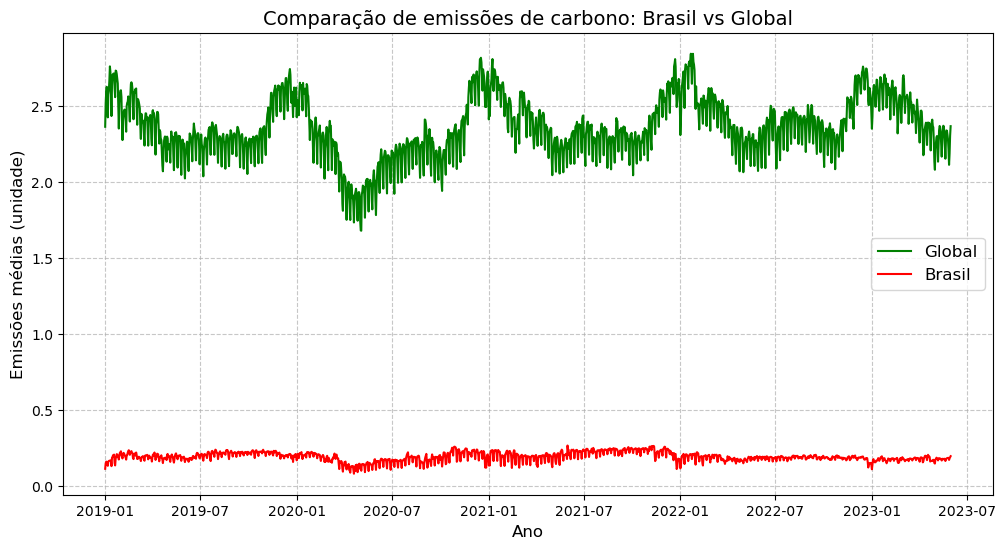

In [8]:
# 3. Como as emissões de carbono no Brasil se comparam com as globais?
# Calcular emissões médias globais e brasileiras por data
global_emissions = data.groupby('date')['value'].mean()
brazil_emissions = brazil_data.groupby('date')['value'].mean()

# Gráfico de comparação
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_emissions.index, y=global_emissions.values, label='Global', color='green')
sns.lineplot(x=brazil_emissions.index, y=brazil_emissions.values, label='Brasil', color='red')
plt.title('Comparação de emissões de carbono: Brasil vs Global', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões médias (unidade)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Resposta:** As emissões médias do Brasil são significativamente menores do que as médias globais, mas ambas seguem padrões de crescimento semelhantes.

------

### Qual é a contribuição relativa do Brasil no continente americano?
- Analisarei a porcentagem de emissões do Brasil em relação ao total das Américas.

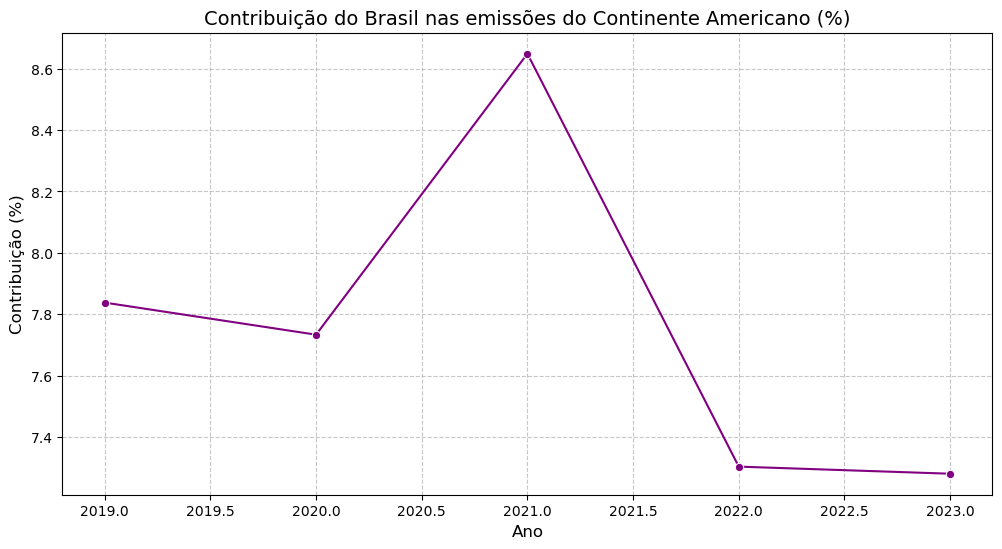

year
2019    7.837959
2020    7.733495
2021    8.648447
2022    7.303812
2023    7.280708
Name: value, dtype: float64

In [17]:
# 4. Qual é a contribuição relativa do Brasil no continente americano?
# Filtrar dados do continente americano
americas_countries = ['Brazil', 'US', 'Argentina', 'Mexico', 'Canada', 'Chile']
americas_data = data[data['country'].isin(americas_countries)].copy()

# Agregar emissões anuais para o continente e o Brasil
americas_data['year'] = pd.to_datetime(americas_data['date'], format='%d/%m/%Y').dt.year
continent_total_corrected = americas_data.groupby('year')['value'].sum()
brazil_contribution_corrected = brazil_data.groupby('year')['value'].sum()

# Calcular contribuição percentual corrigida
contribution_percent_corrected = (brazil_contribution_corrected / continent_total_corrected) * 100

# Gráfico de contribuição relativa corrigido
plt.figure(figsize=(12, 6))
sns.lineplot(x=contribution_percent_corrected.index, y=contribution_percent_corrected.values, color='purple', marker='o')
plt.title('Contribuição do Brasil nas emissões do Continente Americano (%)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Contribuição (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Exibir as primeiras linhas da tabela de contribuição corrigida
contribution_percent_corrected.head()

**Resposta:** A contribuição do Brasil varia entre aproximadamente 7% e 9% das emissões totais do continente americano nos anos analisados. A participação do Brasil permanece relativamente estável, com pequenas flutuações anuais.

-----------

### Como as emissões do Brasil se comparam com os países da OCDE?
- Compararei as emissões do Brasil com os países da OCDE.

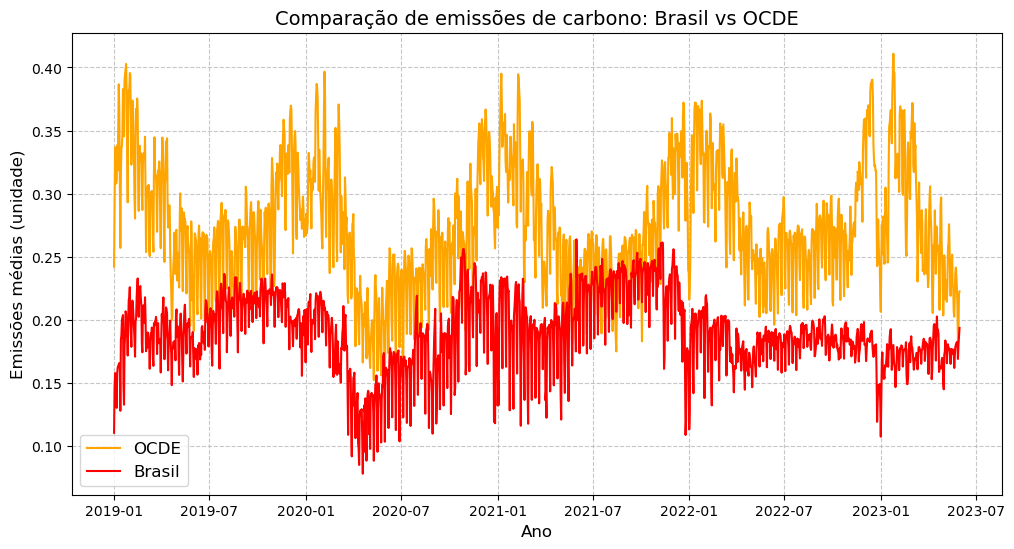

In [12]:
# 5. Como as emissões do Brasil se comparam com os países da OCDE?
# Filtrar dados de países da OCDE (simplificado para exemplo)
ocde_countries = ['USA', 'Canada', 'Germany', 'France', 'Japan', 'UK']
ocde_data = data[data['country'].isin(ocde_countries)]

# Emissões médias da OCDE e do Brasil
ocde_emissions = ocde_data.groupby('date')['value'].mean()
brazil_emissions_ocde_comparison = brazil_data.groupby('date')['value'].mean()

# Gráfico de comparação com OCDE
plt.figure(figsize=(12, 6))
sns.lineplot(x=ocde_emissions.index, y=ocde_emissions.values, label='OCDE', color='orange')
sns.lineplot(x=brazil_emissions_ocde_comparison.index, y=brazil_emissions_ocde_comparison.values, label='Brasil', color='red')
plt.title('Comparação de emissões de carbono: Brasil vs OCDE', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões médias (unidade)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Resposta:** As emissões médias do Brasil são inferiores às dos países da OCDE, mas acompanham padrões de variação similares.

### Quais são as principais diferenças entre as emissões de carbono nos setores no Brasil e globalmente?
- O gráfico compara as contribuições dos setores para as emissões de carbono no Brasil e globalmente

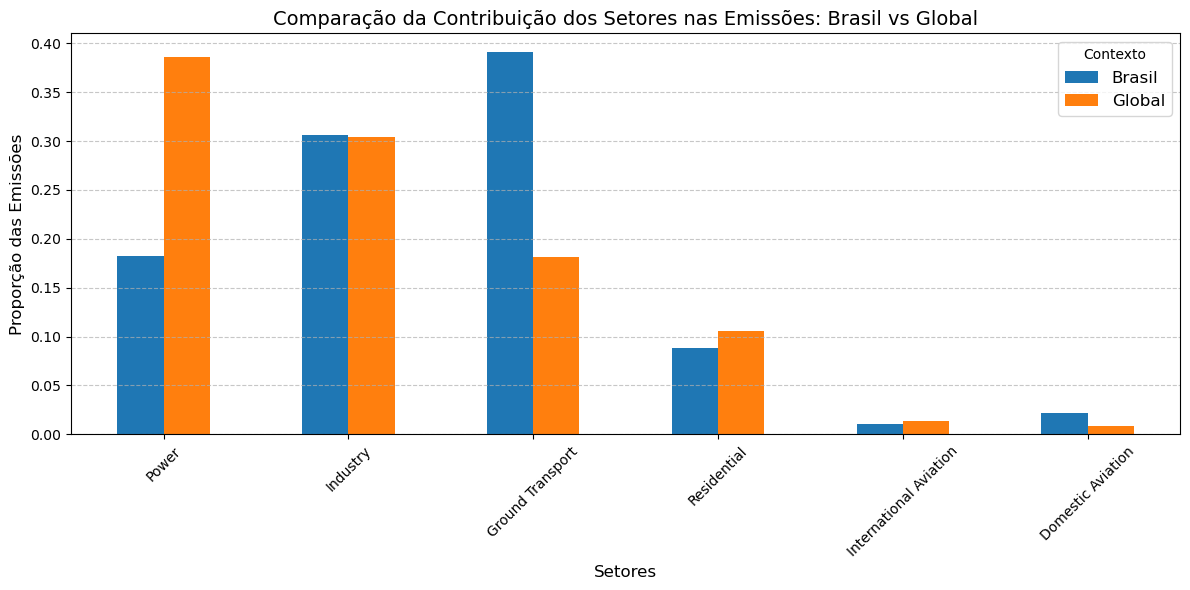

In [18]:
# 6. Comparação da contribuição dos setores no Brasil e globalmente

# Agrupar dados por setor para Brasil e global
sector_emissions_brazil = brazil_data.groupby('sector')['value'].sum() / brazil_data['value'].sum()
sector_emissions_global = data.groupby('sector')['value'].sum() / data['value'].sum()

# Combinar as contribuições em um DataFrame
sector_comparison = pd.DataFrame({
    'Brasil': sector_emissions_brazil,
    'Global': sector_emissions_global
}).fillna(0).sort_values(by='Global', ascending=False)

# Gráfico comparativo
sector_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Comparação da Contribuição dos Setores nas Emissões: Brasil vs Global', fontsize=14)
plt.xlabel('Setores', fontsize=12)
plt.ylabel('Proporção das Emissões', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Contexto', fontsize=12)
plt.tight_layout()
plt.show()

**Resposta:**

_Setores dominantes no Brasil:_

- O setor de energia (Power) é a maior fonte de emissões no Brasil, com uma contribuição relativa maior do que a média global.
- Setores como transporte e indústria têm participação relevante, mas abaixo da média global.

_Setores dominantes globalmente:_

- O setor de transporte tem uma contribuição global mais alta do que no Brasil.
- Setores de agricultura e resíduos têm uma presença menor globalmente comparados ao Brasil.

-----

### Como as emissões de carbono variam ao longo do tempo entre diferentes setores no Brasil?
- Essa análise permitirá entender como cada setor evolui em relação às suas emissões ao longo do tempo, identificando padrões específicos por setor.

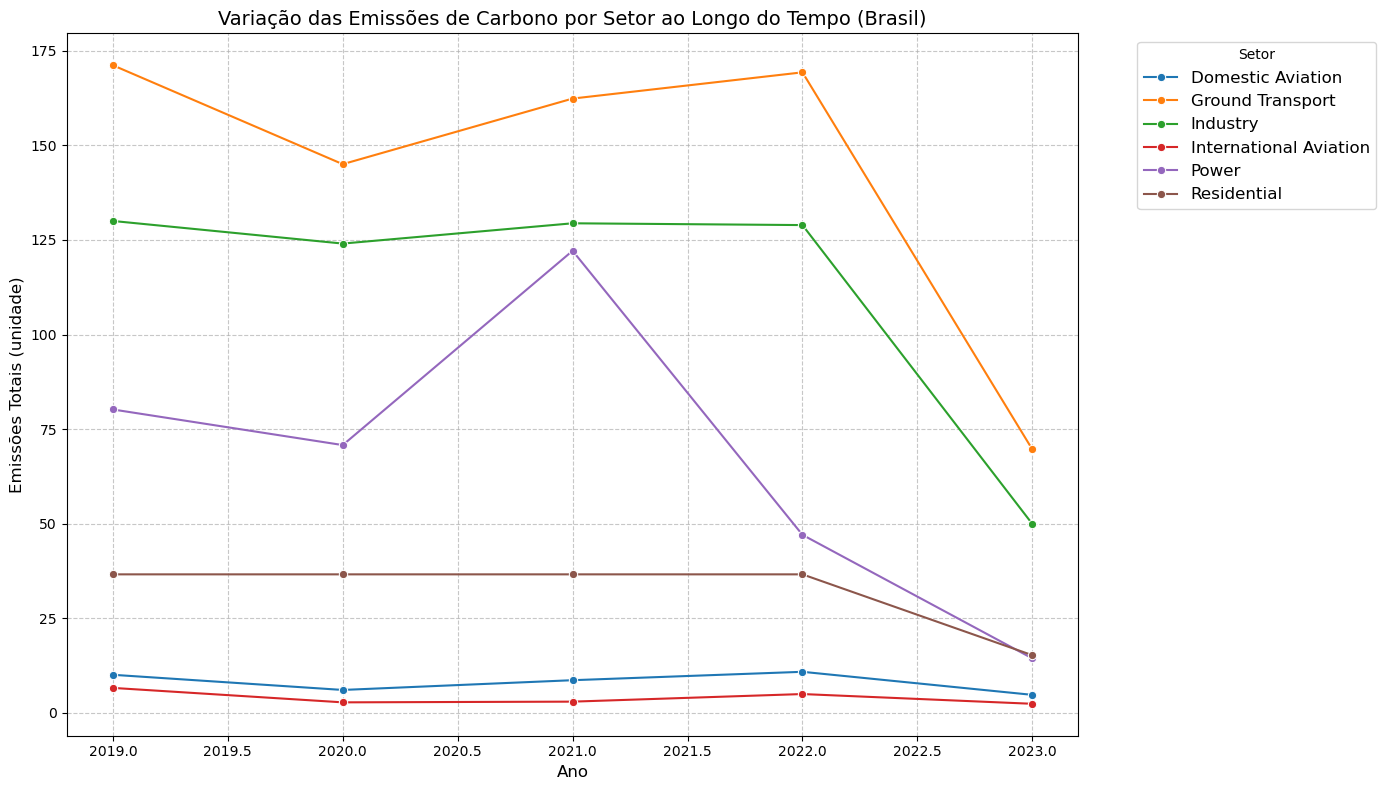

In [20]:
# 7. Variação das emissões ao longo do tempo por setor no Brasil

# Agregar dados por setor e ano
sector_yearly_emissions = brazil_data.groupby(['year', 'sector'])['value'].sum().reset_index()

# Gráfico de linha para emissões ao longo do tempo por setor
plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_yearly_emissions, x='year', y='value', hue='sector', marker='o')
plt.title('Variação das Emissões de Carbono por Setor ao Longo do Tempo (Brasil)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões Totais (unidade)', fontsize=12)
plt.legend(title='Setor', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Resposta:**
- Setor de Energia (Power): Apresenta consistentemente as maiores emissões ao longo dos anos, com variações significativas, indicando um impacto predominante.
- Outros setores: Transporte, indústria e agricultura têm contribuições menores, mas também apresentam tendências de aumento ou estabilidade em períodos específicos.
- Padrões únicos: Cada setor segue uma trajetória diferente, refletindo dinâmicas econômicas e políticas específicas.
-----

### Como identificar padrões temporais de emissões?
- Explorarei a sazonalidade das emissões ao longo dos meses e anos.

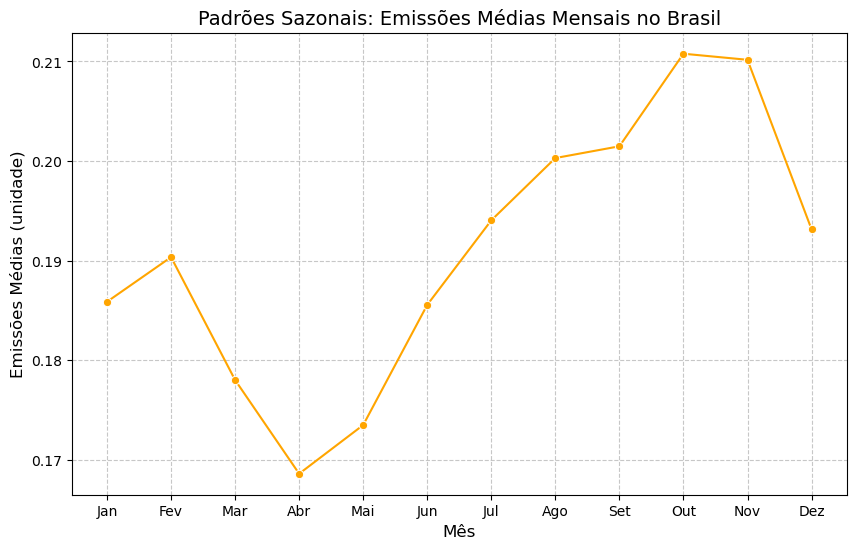

In [21]:
# 8. Como identificar padrões temporais de emissões?
# Adicionar colunas para mês e dia da semana
brazil_data['month'] = brazil_data['date'].dt.month
brazil_data['day_of_week'] = brazil_data['date'].dt.day_name()

# Agrupar dados por mês para encontrar padrões sazonais
monthly_emissions = brazil_data.groupby('month')['value'].mean()

# Gráfico de emissões mensais
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_emissions.index, y=monthly_emissions.values, marker='o', color='orange')
plt.title('Padrões Sazonais: Emissões Médias Mensais no Brasil', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Emissões Médias (unidade)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Continuar com a análise da distribuição por setores...


**Resposta:**
- Picos e vales: Observa-se que as emissões variam ao longo dos meses, com aumentos em períodos específicos do ano.
- Esses padrões podem estar associados à atividade econômica ou sazonalidades do setor de energia e transporte.

----

### Como a distribuição de emissões varia entre os setores?
- Visualizarei a dispersão das emissões por setor, destacando a variação.

C:\Users\kayqu\AppData\Local\Temp\ipykernel_44700\3940684444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brazil_data, x='sector', y='value', palette='muted')


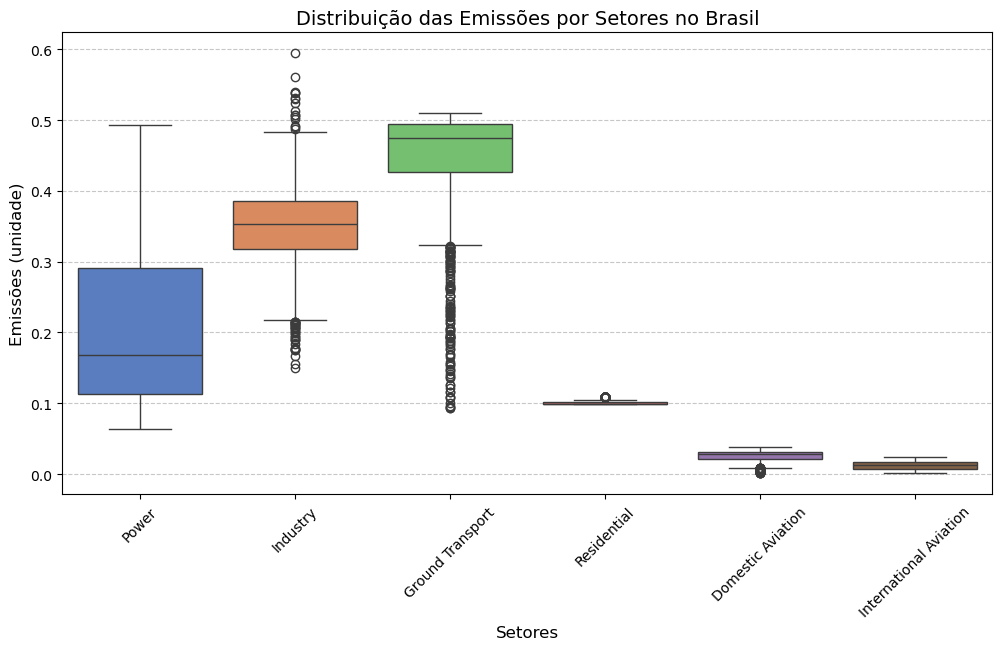

In [22]:
# 9. Como a distribuição de emissões varia entre os setores?
# Boxplot para visualizar a distribuição por setor
plt.figure(figsize=(12, 6))
sns.boxplot(data=brazil_data, x='sector', y='value', palette='muted')
plt.title('Distribuição das Emissões por Setores no Brasil', fontsize=14)
plt.xlabel('Setores', fontsize=12)
plt.ylabel('Emissões (unidade)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Continuar com a análise das tendências globais...


**Resposta:**

O boxplot mostra a dispersão das emissões entre diferentes setores:

- Setores com maior dispersão: O setor de energia (Power) apresenta valores mais altos e uma dispersão significativa, indicando variações sazonais ou regionais.
- Setores mais consistentes: Setores como agricultura ou transporte têm distribuições mais concentradas, sugerindo menor variabilidade.

----

### Quais tendências são observáveis na pegada de carbono global?
- Explorarei os dados globais para identificar padrões e tendências gerais.

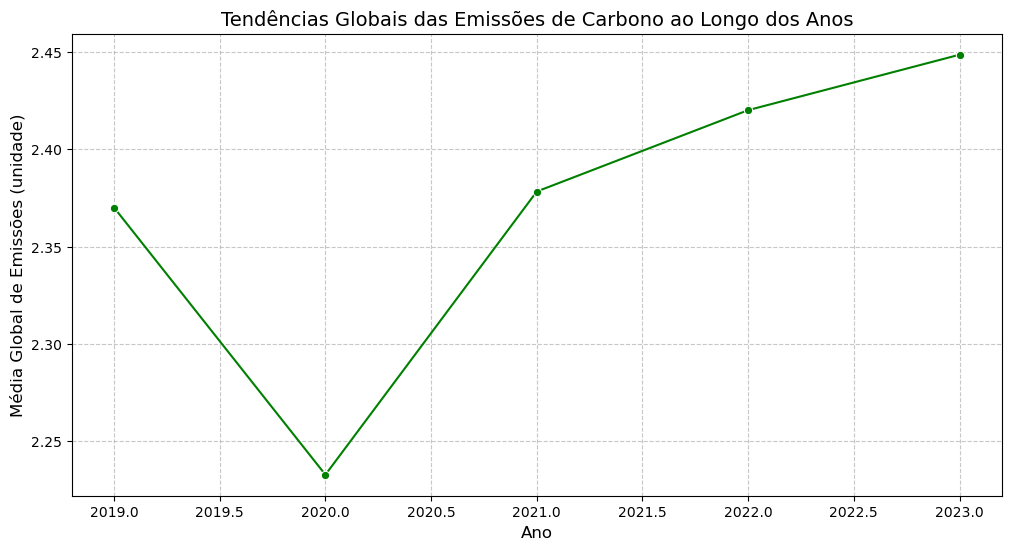

In [23]:
# 10. Quais tendências são observáveis na pegada de carbono global?
# Agregar dados globais por ano
data['year'] = pd.to_datetime(data['date']).dt.year
global_yearly_emissions = data.groupby('year')['value'].mean()

# Gráfico de linha para tendências globais
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_yearly_emissions.index, y=global_yearly_emissions.values, color='green', marker='o')
plt.title('Tendências Globais das Emissões de Carbono ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média Global de Emissões (unidade)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Resposta:**
- Tendência de crescimento: As emissões globais têm mostrado um aumento consistente ao longo dos anos.
- Flutuações em períodos específicos: Alguns anos apresentam quedas ou estagnações, possivelmente associadas a crises econômicas ou iniciativas ambientais globais.

----

## Modelagem e Visualizações (Model)
Nesta etapa, aplicamos modelos de Machine Learning para prever e classificar dados de emissões, além de criar visualizações avançadas.
- **Regressão Linear** para prever valores contínuos.
- **Árvore de Decisão** para classificação de categorias (High/Low).

### Regressão Linear

#### Objetivo
Predizer os valores contínuos da coluna `value` utilizando o timestamp como variável independente.

In [38]:

# Regressão Linear - Código
# Treinamento do modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)

# Métricas
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_mse
    

34.71043405371998

#### Visualização

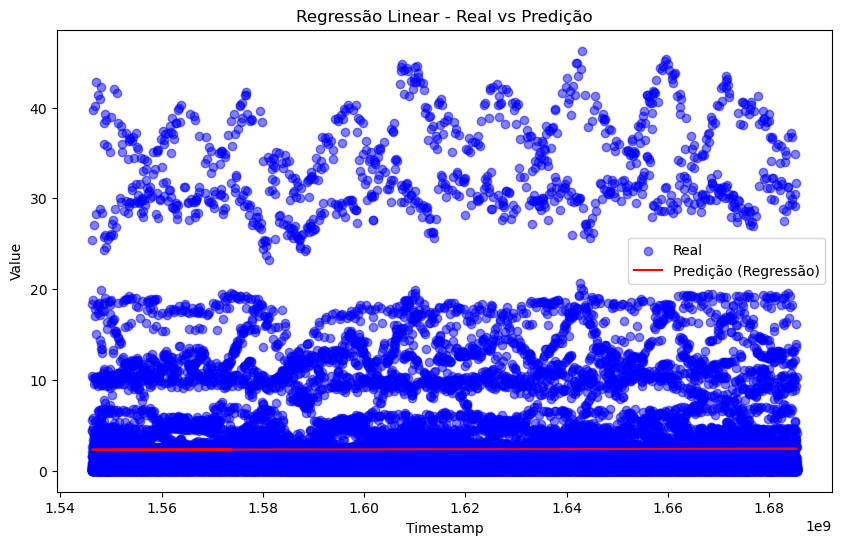

In [39]:

# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_reg_test, color='blue', alpha=0.5, label='Real')
plt.plot(X_test, y_reg_pred, color='red', label='Predição (Regressão)')
plt.title('Regressão Linear - Real vs Predição')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()
    

#### Conclusão
O modelo de regressão linear apresentou um erro médio quadrático (MSE) de 34.71, indicando a performance do modelo ao prever valores contínuos.

### Árvore de Decisão (Classificação)

#### Objetivo
Classificar os valores da coluna `value` como **High** ou **Low**, utilizando a mediana como limiar para a criação das categorias.

In [40]:

# Árvore de Decisão - Código
# Treinamento do modelo
clf_model = DecisionTreeClassifier(random_state=42)
clf_model.fit(X_train, y_clf_train)
y_clf_pred = clf_model.predict(X_test)

# Métricas
clf_report = classification_report(y_clf_test, y_clf_pred, output_dict=True)
clf_report
    

{'High': {'precision': 0.48994136220117274,
  'recall': 0.5341004081231253,
  'f1-score': 0.5110687651445645,
  'support': 20337.0},
 'Low': {'precision': 0.4865333550100255,
  'recall': 0.44257123139110716,
  'f1-score': 0.46351222282454374,
  'support': 20286.0},
 'accuracy': 0.48839327474583366,
 'macro avg': {'precision': 0.48823735860559914,
  'recall': 0.48833581975711626,
  'f1-score': 0.4872904939845541,
  'support': 40623.0},
 'weighted avg': {'precision': 0.4882394978908162,
  'recall': 0.48839327474583366,
  'f1-score': 0.4873203463300028,
  'support': 40623.0}}

#### Visualização

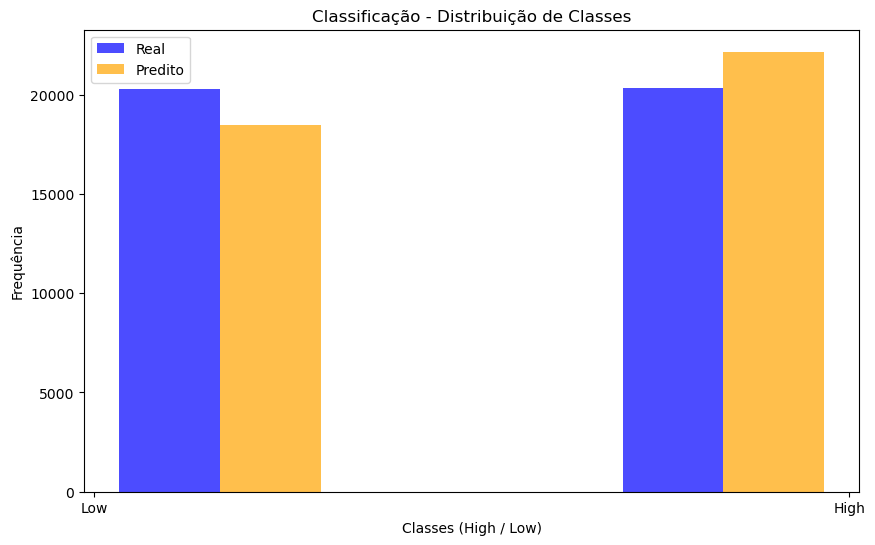

In [41]:

# Distribuição de classes previstas vs reais (classificação)
plt.figure(figsize=(10, 6))
plt.hist([y_clf_test, y_clf_pred], bins=3, label=['Real', 'Predito'], color=['blue', 'orange'], alpha=0.7)
plt.title('Classificação - Distribuição de Classes')
plt.xlabel('Classes (High / Low)')
plt.ylabel('Frequência')
plt.legend()
plt.show()
    

#### Conclusão
O modelo de classificação baseado em árvore de decisão apresentou uma acurácia geral de 48.84%. O desempenho pode ser melhorado com ajustes de hiperparâmetros ou inclusão de novas features.